In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
%matplotlib inline

In [2]:
df = pd.read_csv("../data/processed/processed_data.csv")

df["date"] = pd.to_datetime(df["date"])
df.head()

,date,coin,open,high,low,close,volume
0,2025-01-23 05:30:00,ADA,0.9827,1.0118,0.9512,0.9867,192569354.5
1,2025-01-24 05:30:00,ADA,0.9867,1.0100,0.9636,0.9712,124426928.3
2,2025-01-25 05:30:00,ADA,0.9712,0.9919,0.9642,0.9766,56721656.8
3,2025-01-26 05:30:00,ADA,0.9766,1.0003,0.9515,0.9530,73197919.3
4,2025-01-27 05:30:00,ADA,0.9530,0.9587,0.8568,0.9345,257950415.8


In [3]:
# Data types and nulls
df.info()

# Summary statistics
df.describe()

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3650 non-null   datetime64[ns]
 1   coin    3650 non-null   object        
 2   open    3650 non-null   float64       
 3   high    3650 non-null   float64       
 4   low     3650 non-null   float64       
 5   close   3650 non-null   float64       
 6   volume  3650 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 199.7+ KB


date      0
coin      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [4]:
df[["open", "high", "low", "close"]].describe()

,open,high,low,close
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,10538.977106,10702.635643,10356.062049,10535.144726
std,30498.219321,30947.421780,29995.676492,30487.565459
min,0.117470,0.123810,0.095000,0.117470
25%,0.698350,0.718325,0.665550,0.698025
50%,36.783500,38.098000,29.478000,36.735500
75%,756.397500,770.082500,744.172500,757.015000
max,124658.540000,126199.630000,123084.000000,124658.540000


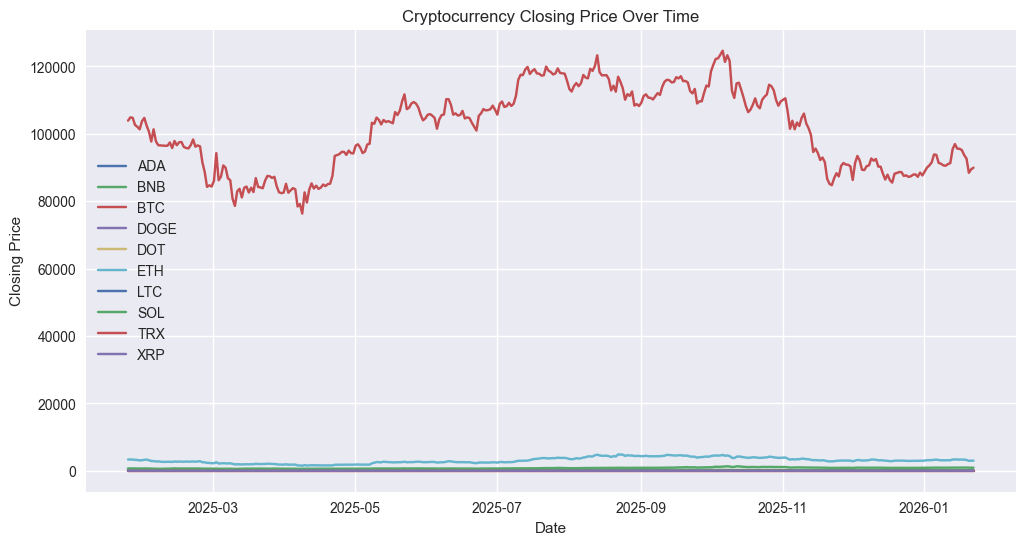

In [5]:
plt.figure(figsize=(12,6))

for coin in df["coin"].unique():
    coin_df = df[df["coin"] == coin]
    plt.plot(coin_df["date"], coin_df["close"], label=coin)

plt.legend()
plt.title("Cryptocurrency Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

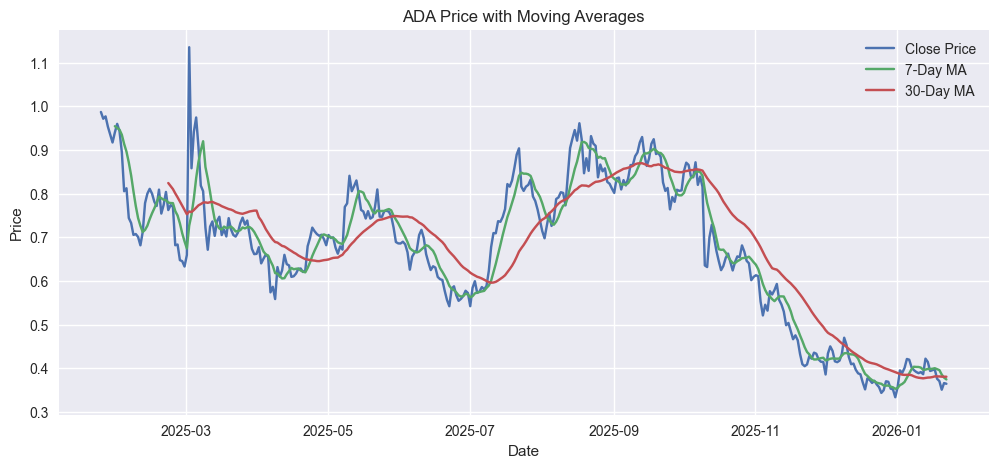

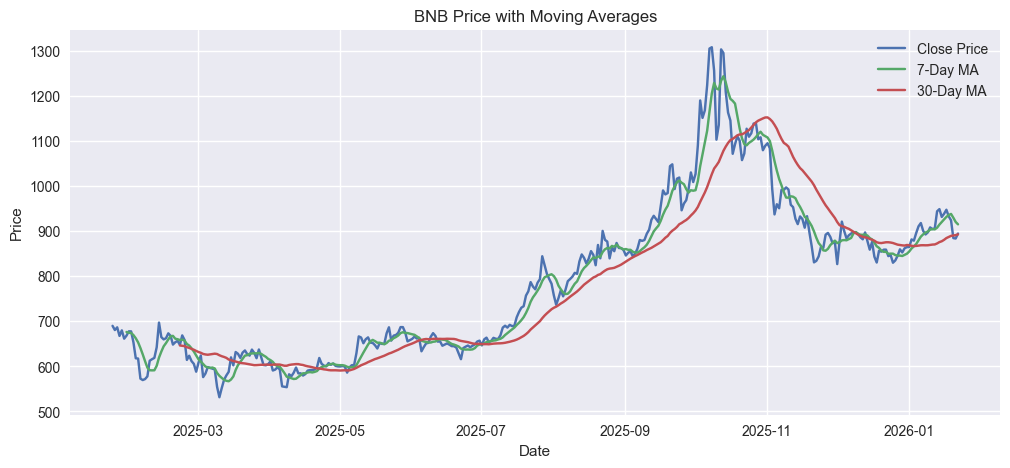

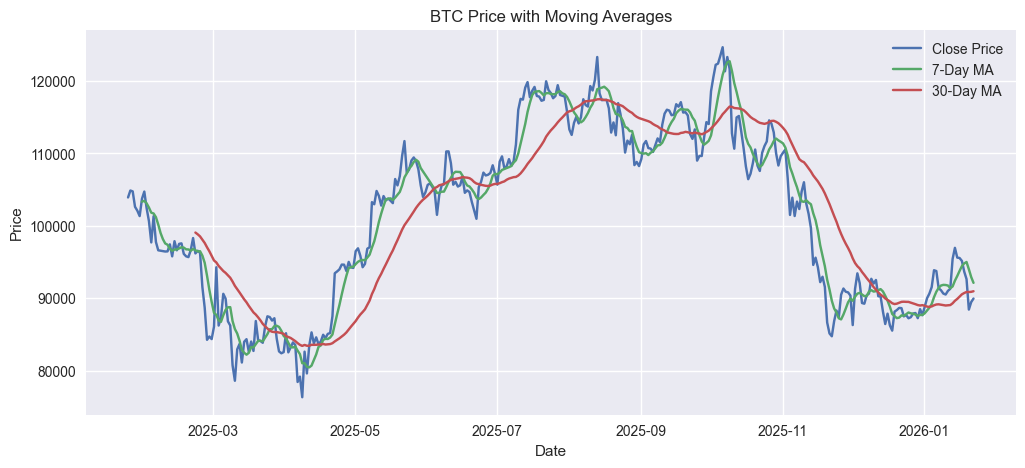

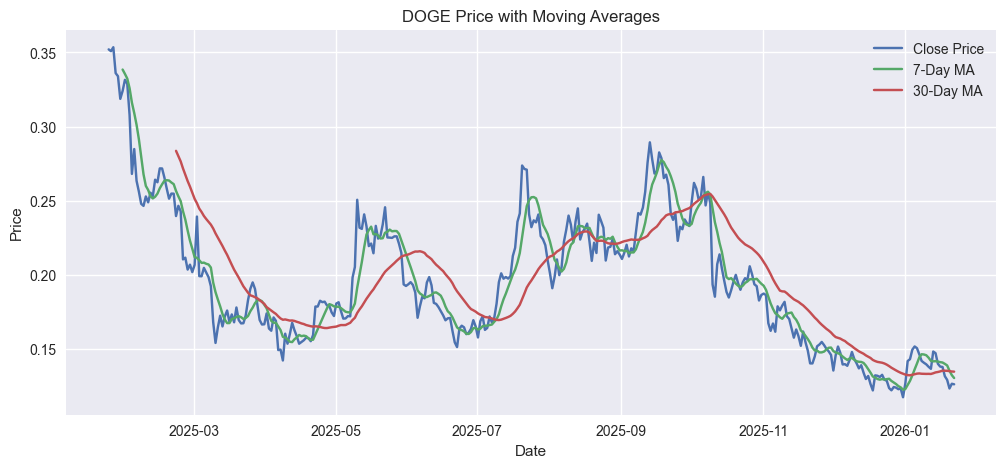

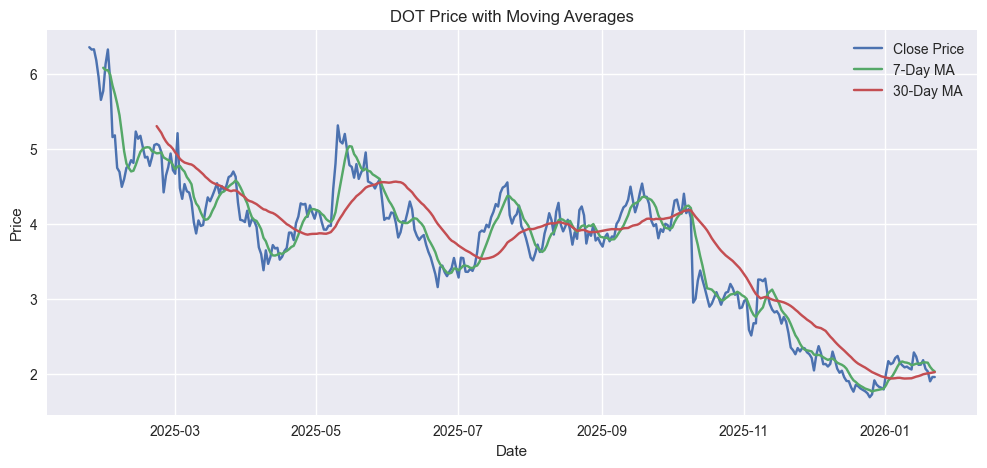

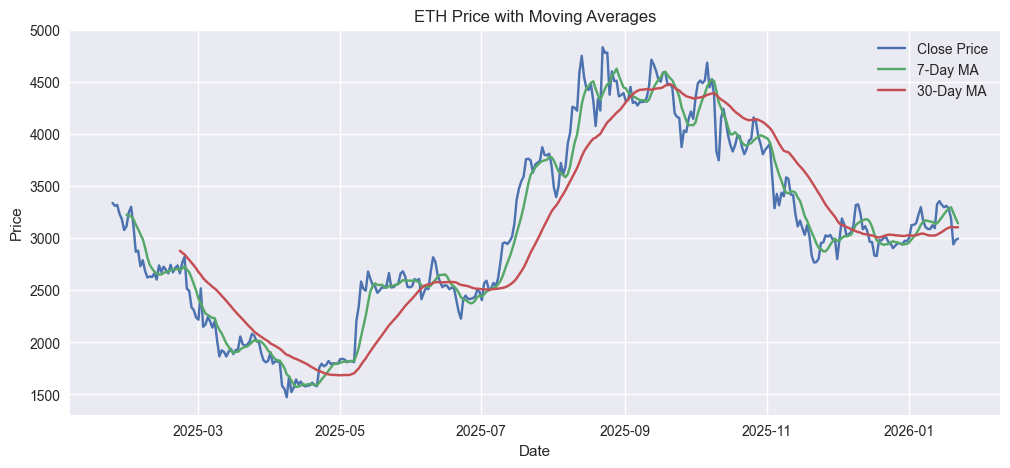

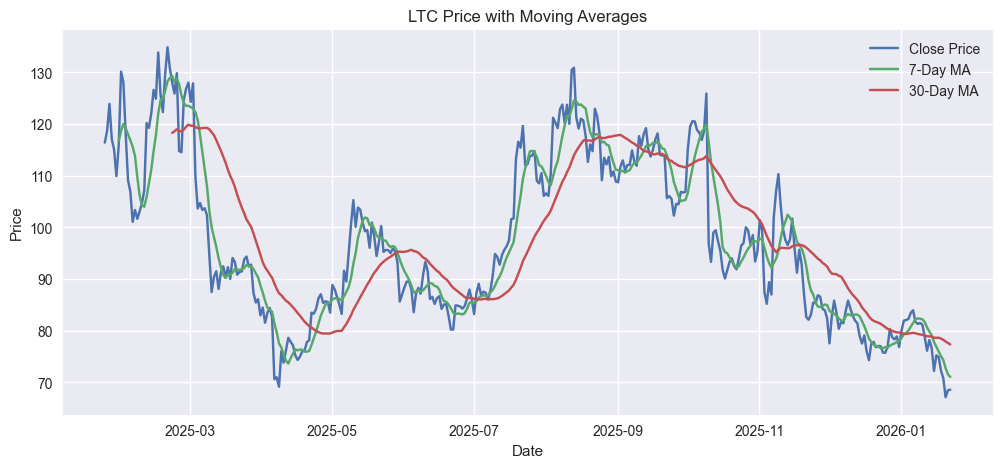

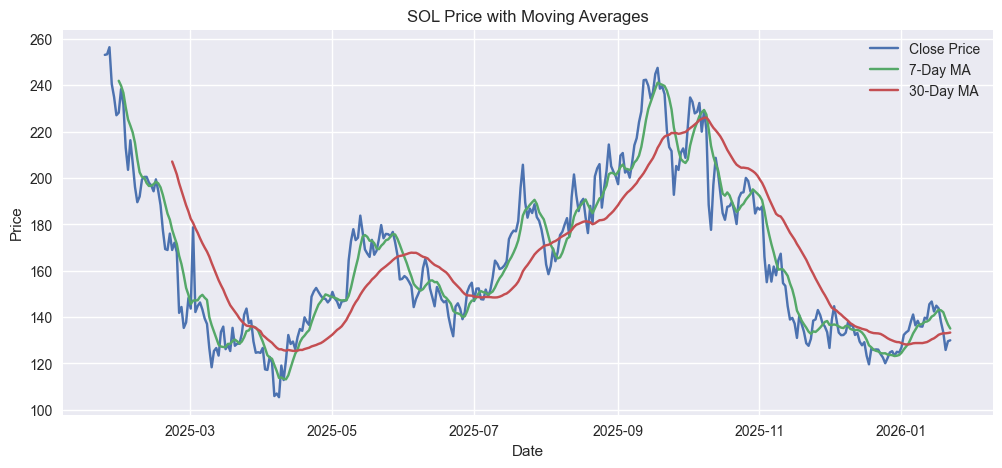

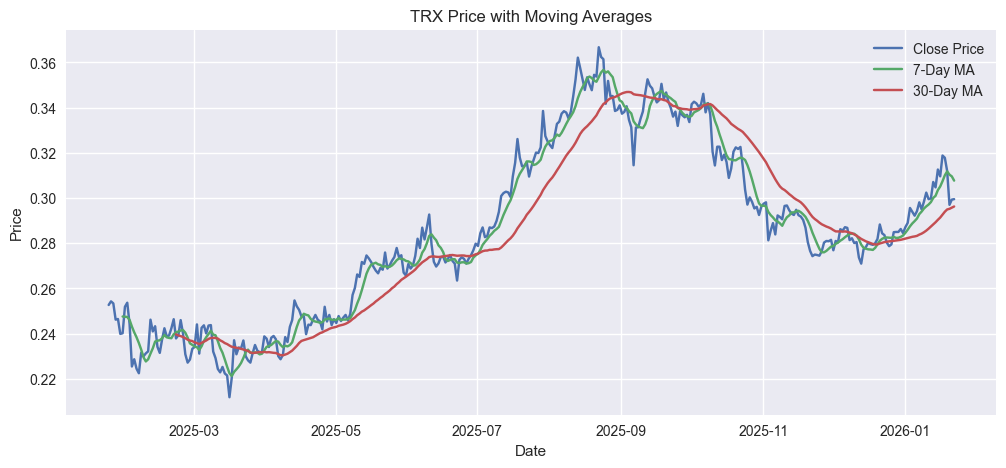

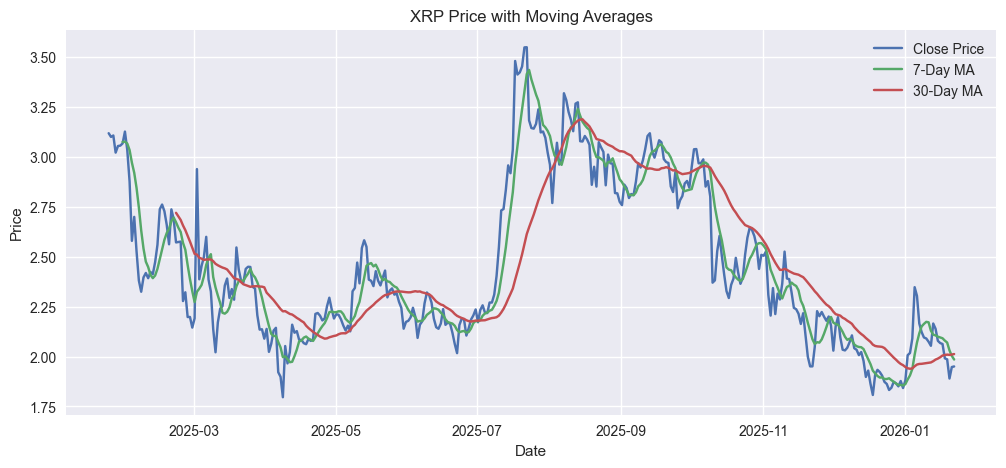

In [6]:
df["ma_7"] = df.groupby("coin")["close"].transform(lambda x: x.rolling(7).mean())
df["ma_30"] = df.groupby("coin")["close"].transform(lambda x: x.rolling(30).mean())

for coin in df["coin"].unique():
    coin_df = df[df["coin"] == coin]
    plt.figure(figsize=(12,5))
    plt.plot(coin_df["date"], coin_df["close"], label="Close Price")
    plt.plot(coin_df["date"], coin_df["ma_7"], label="7-Day MA")
    plt.plot(coin_df["date"], coin_df["ma_30"], label="30-Day MA")
    plt.title(f"{coin} Price with Moving Averages")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

In [7]:
df["intraday_range"] = df["high"] - df["low"]
df[["coin", "date", "intraday_range"]].head()

,coin,date,intraday_range
0,ADA,2025-01-23 05:30:00,0.0606
1,ADA,2025-01-24 05:30:00,0.0464
2,ADA,2025-01-25 05:30:00,0.0277
3,ADA,2025-01-26 05:30:00,0.0488
4,ADA,2025-01-27 05:30:00,0.1019


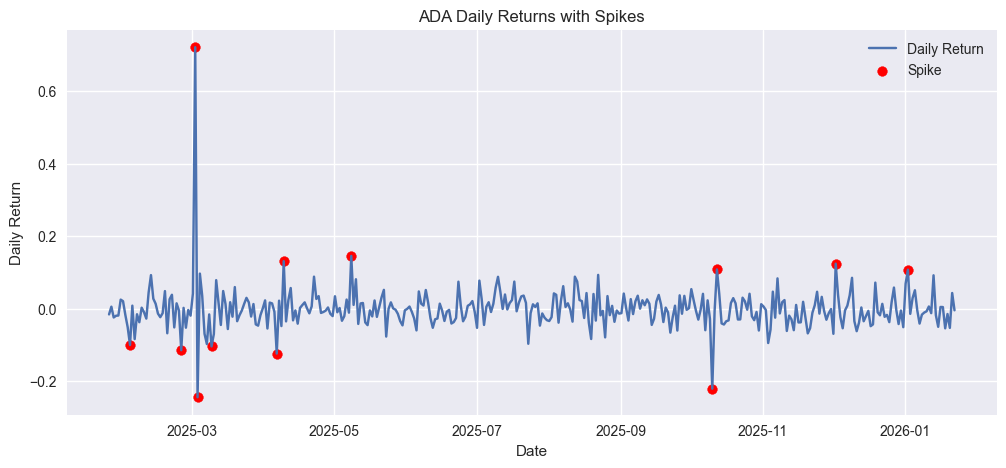

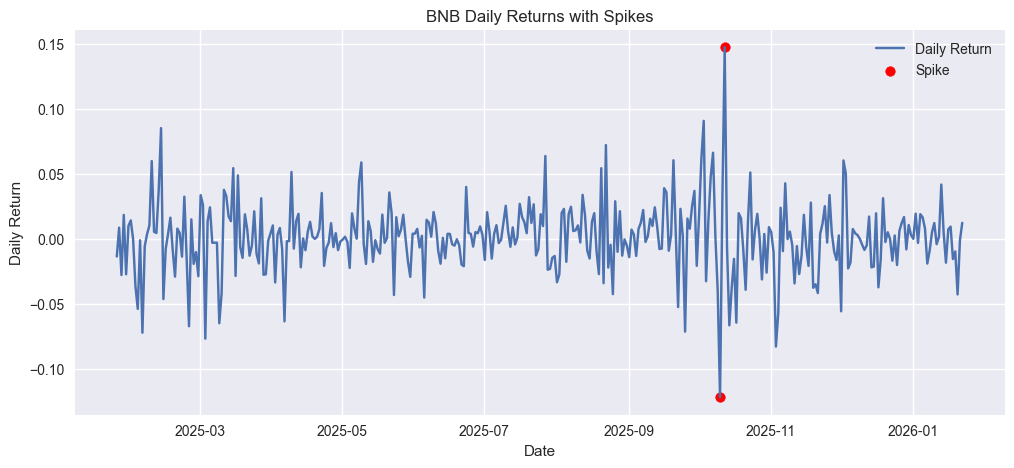

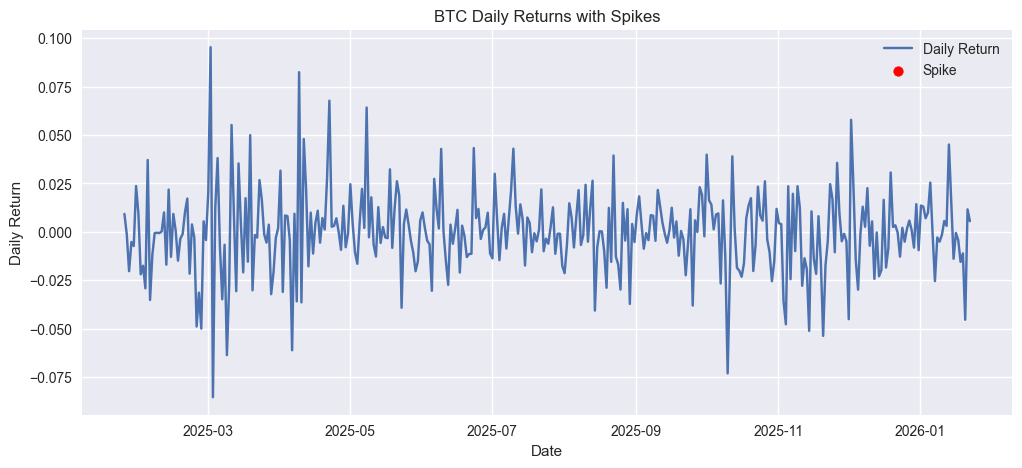

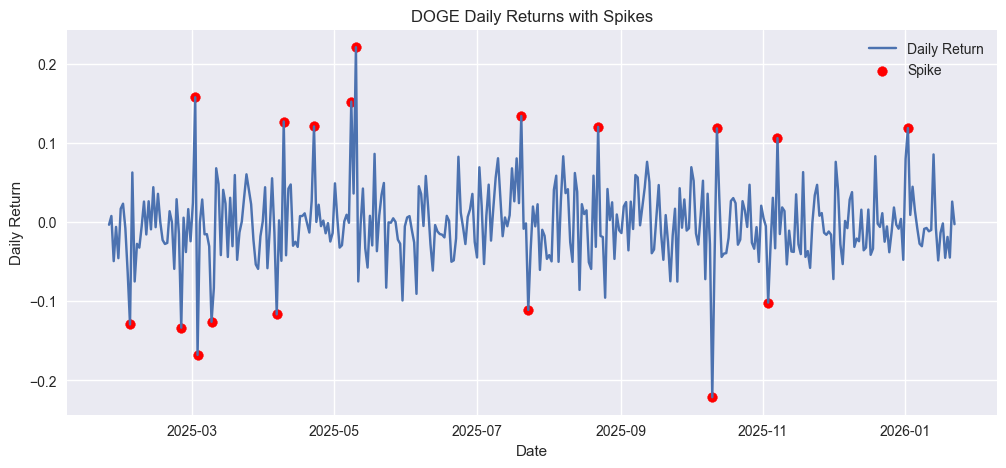

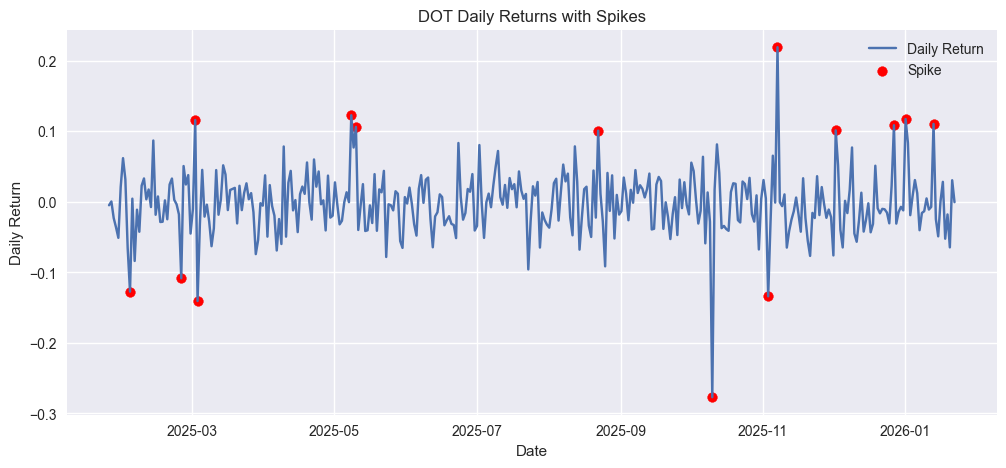

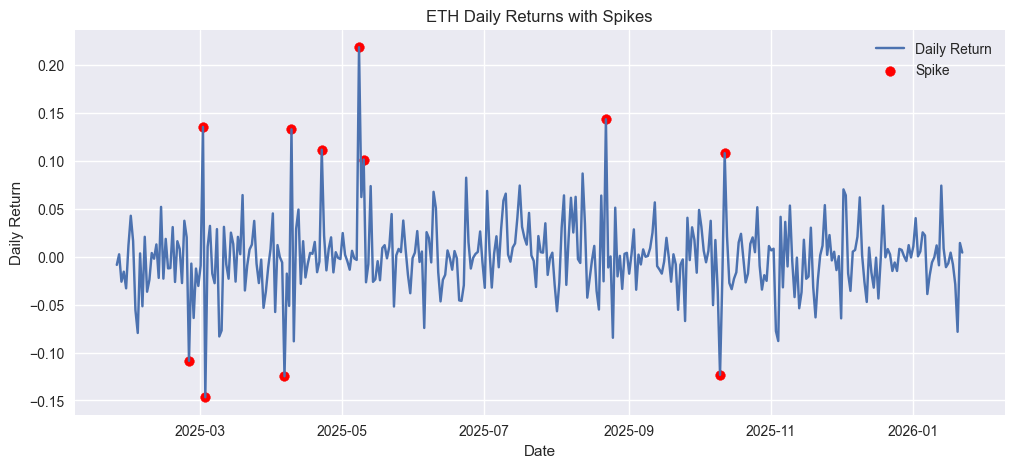

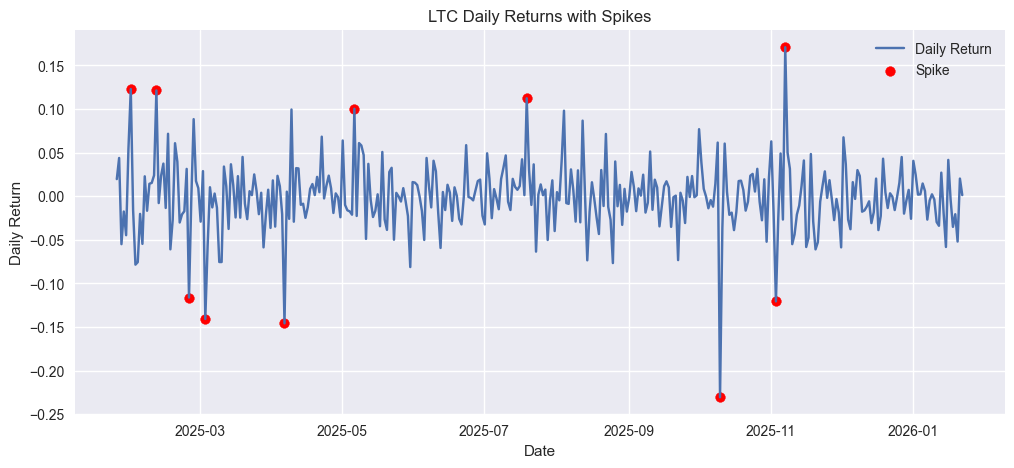

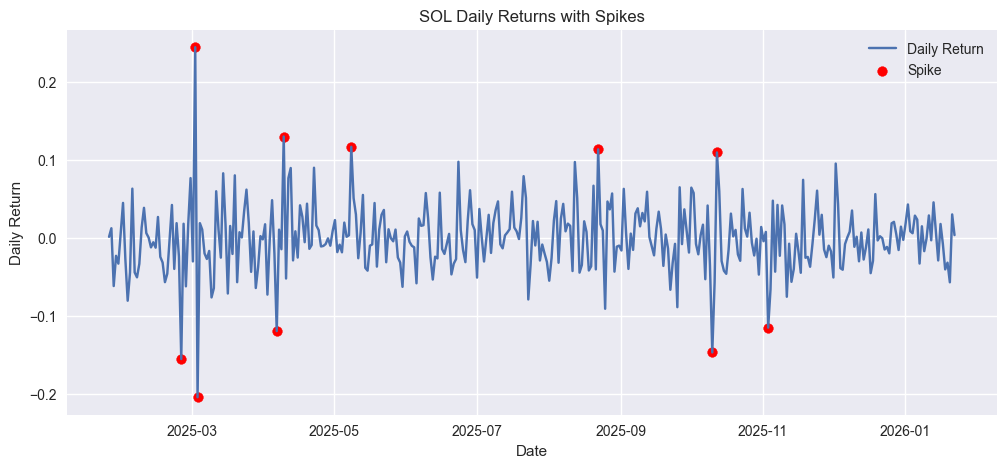

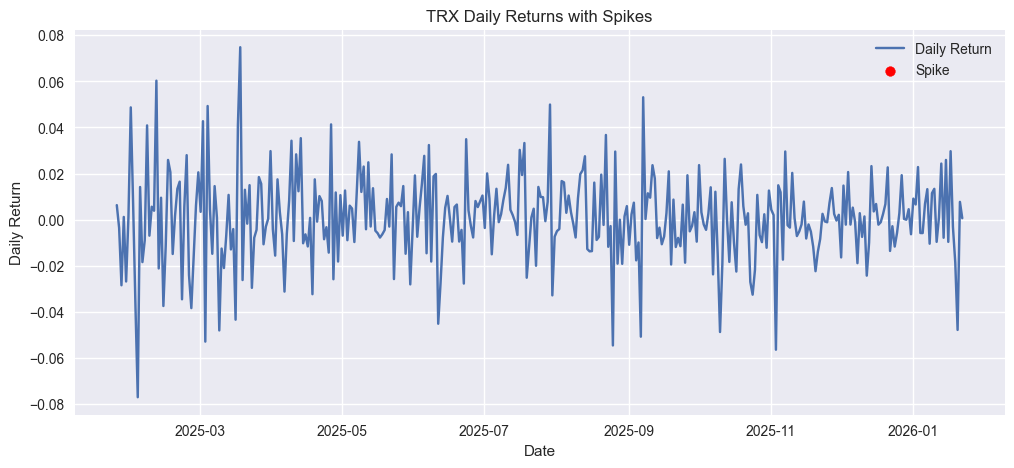

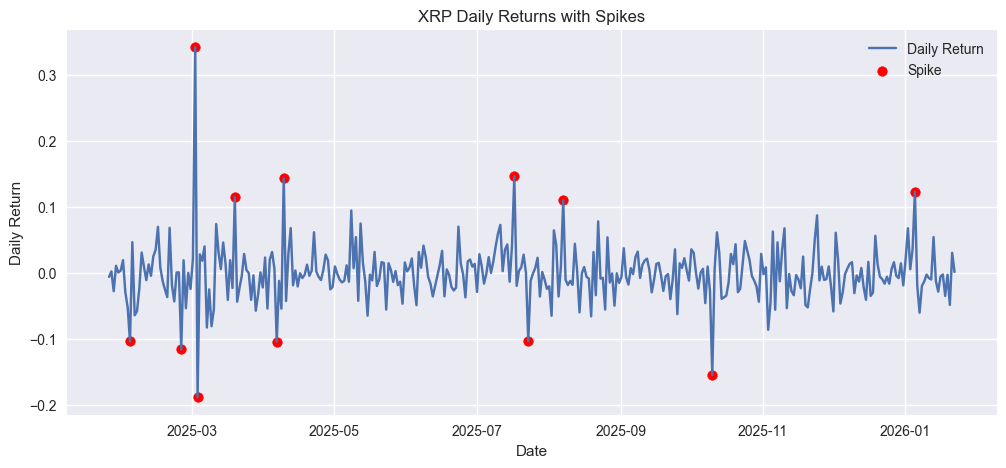

In [8]:
df["daily_return"] = df.groupby("coin")["close"].pct_change()

# Spike definition: >10% daily movement
df["spike"] = df["daily_return"].abs() > 0.10

for coin in df["coin"].unique():
    coin_df = df[df["coin"] == coin]
    plt.figure(figsize=(12,5))
    plt.plot(coin_df["date"], coin_df["daily_return"], label="Daily Return")
    plt.scatter(
        coin_df[coin_df["spike"]]["date"],
        coin_df[coin_df["spike"]]["daily_return"],
        color="red",
        label="Spike"
    )
    plt.title(f"{coin} Daily Returns with Spikes")
    plt.xlabel("Date")
    plt.ylabel("Daily Return")
    plt.legend()
    plt.show()

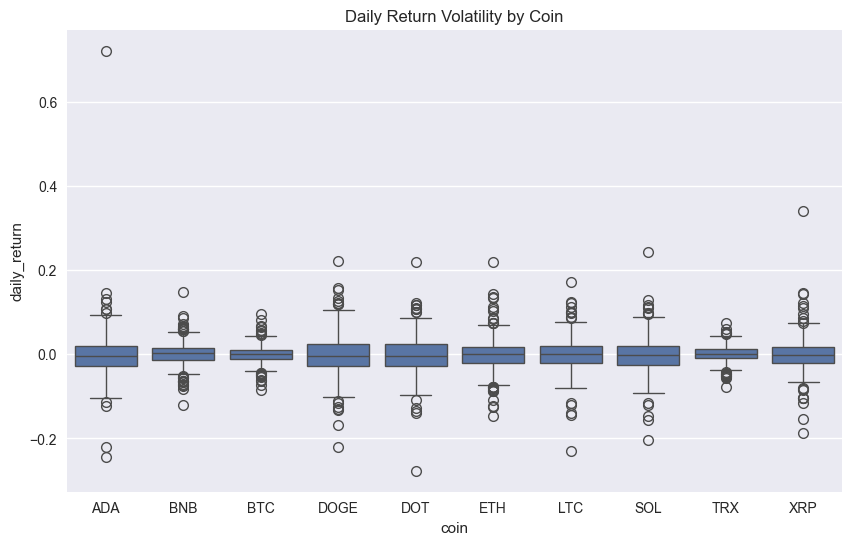

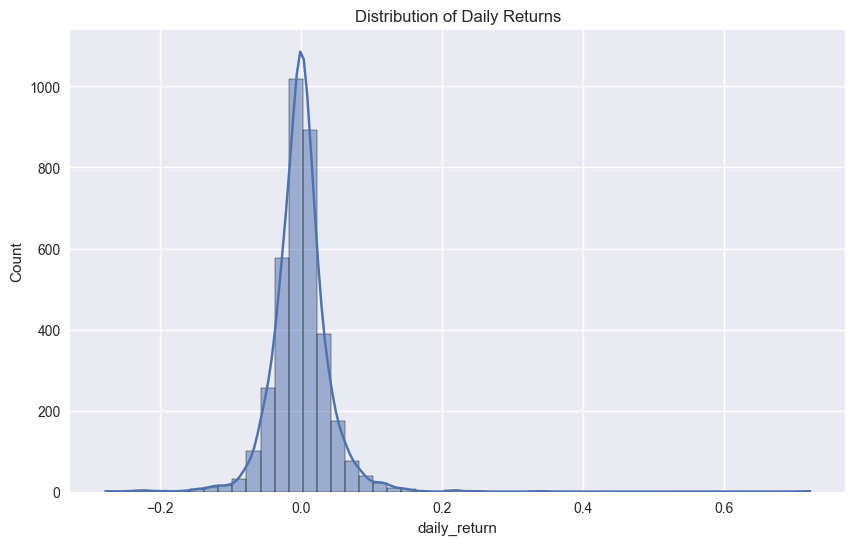

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x="coin", y="daily_return", data=df)
plt.title("Daily Return Volatility by Coin")
plt.show()
plt.figure(figsize=(10,6))
sns.histplot(df["daily_return"].dropna(), bins=50, kde=True)
plt.title("Distribution of Daily Returns")
plt.show()

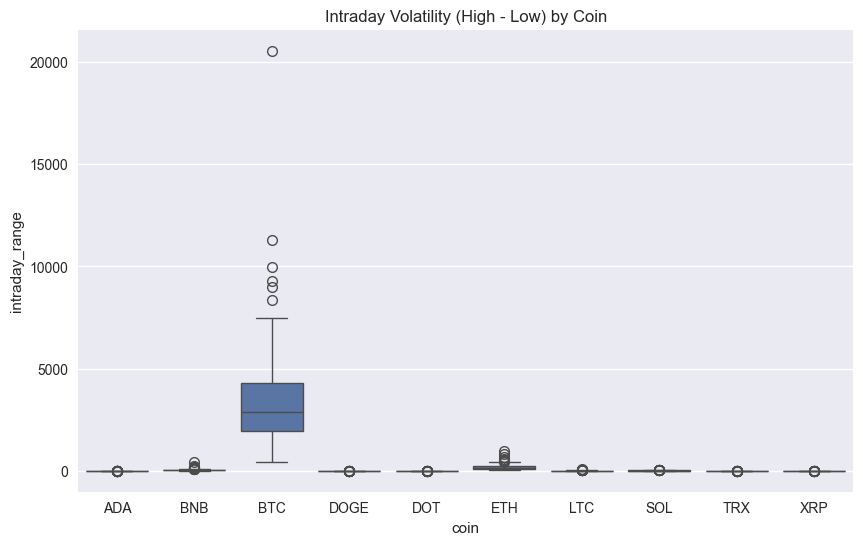

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x="coin", y="intraday_range", data=df)
plt.title("Intraday Volatility (High - Low) by Coin")
plt.show()

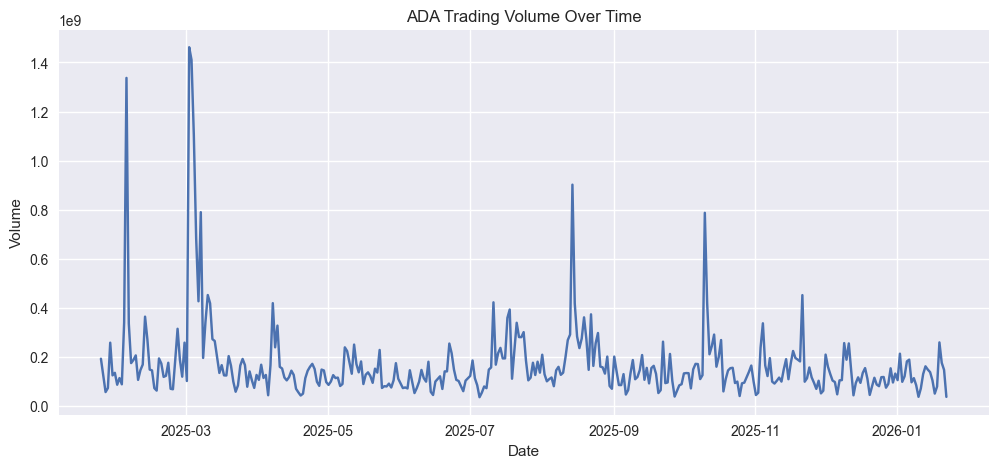

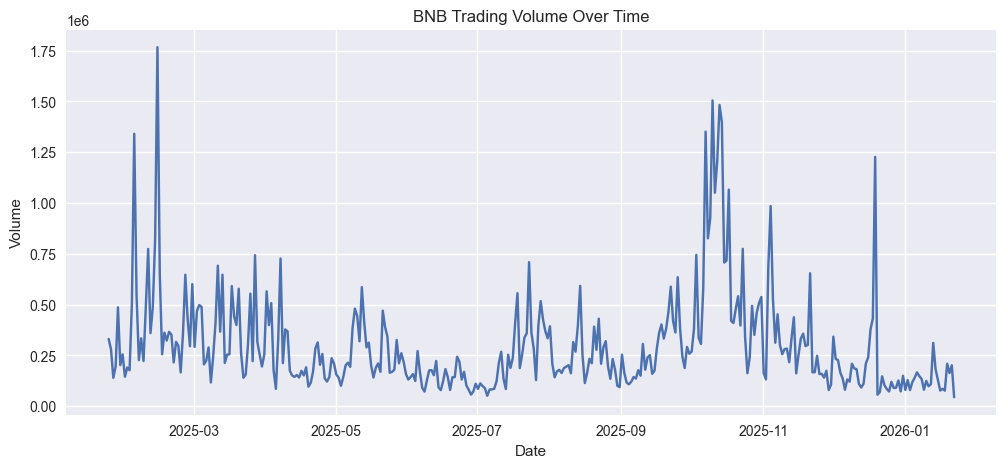

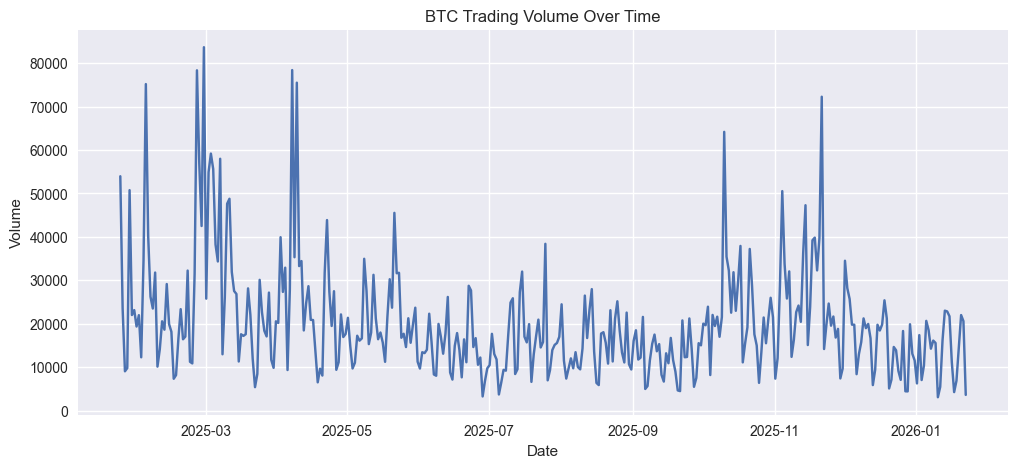

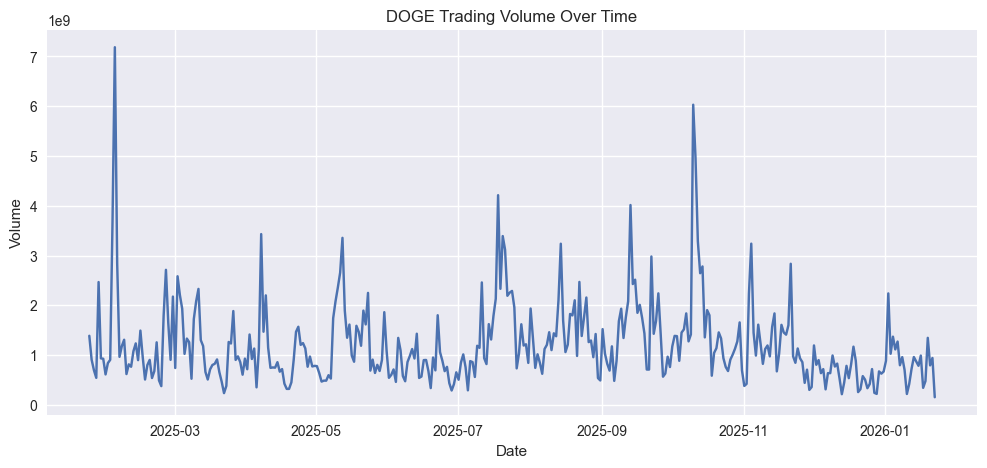

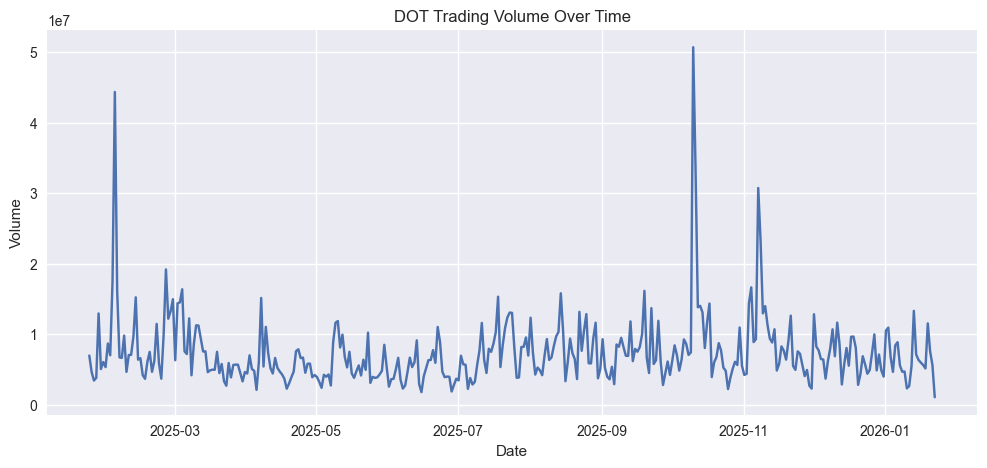

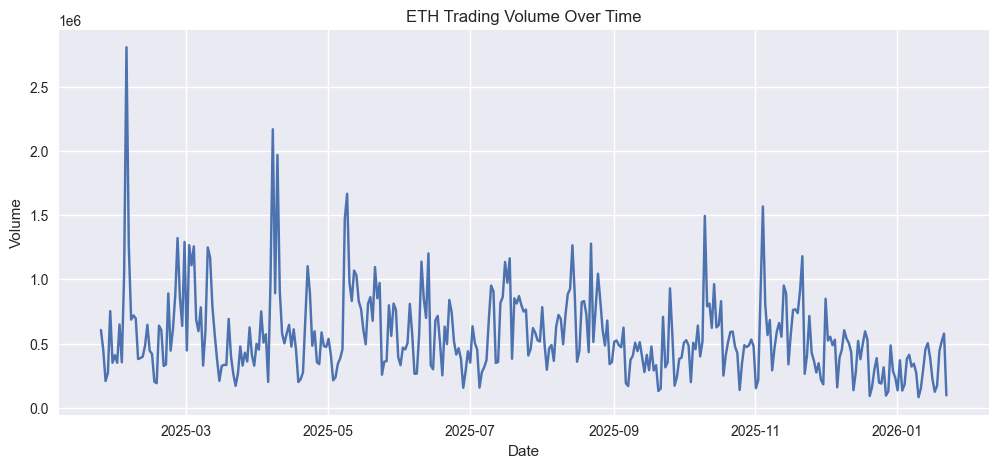

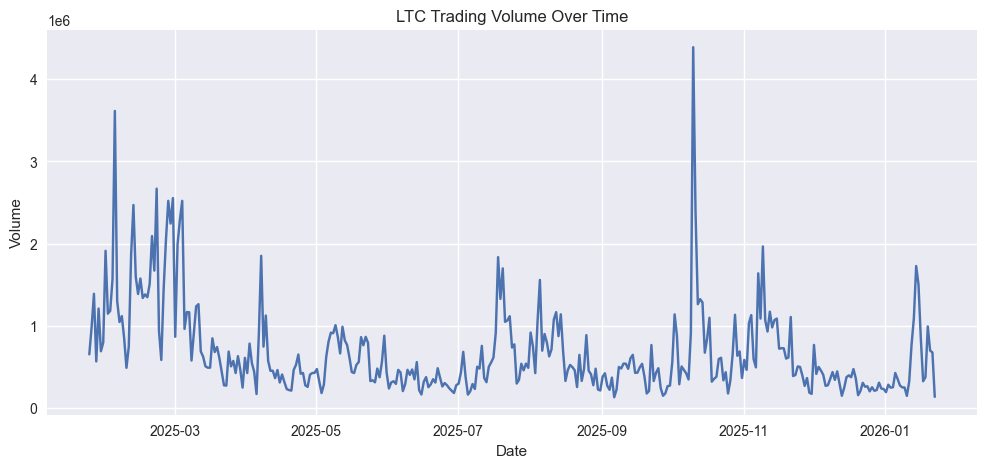

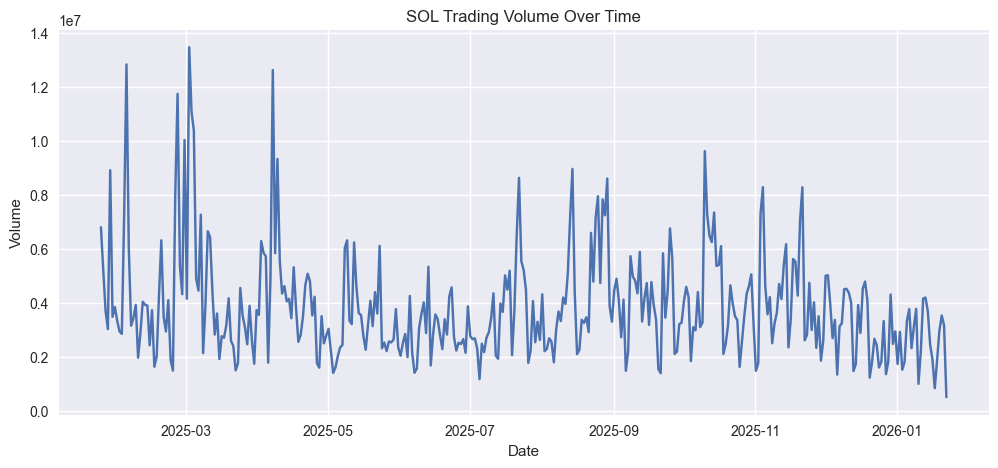

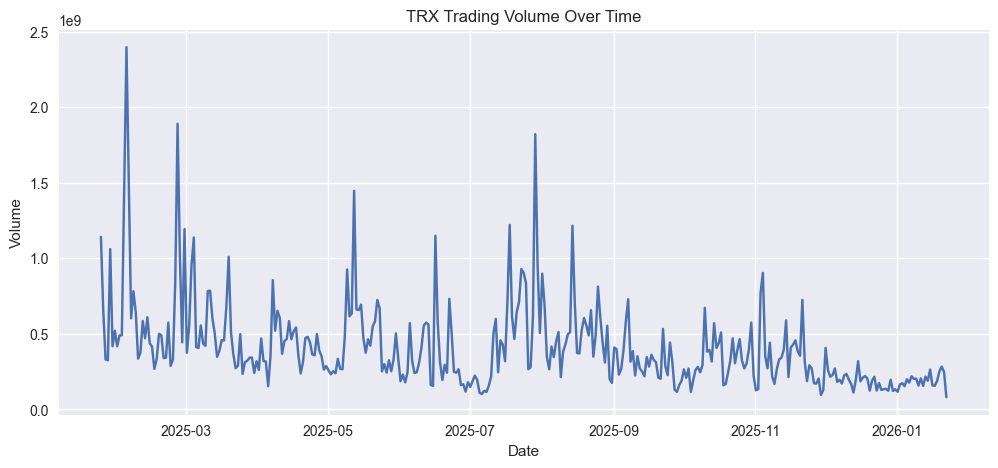

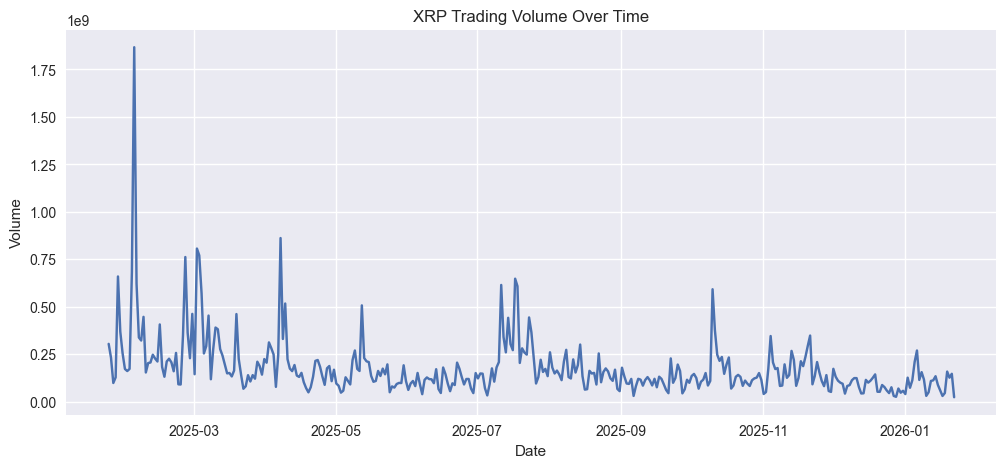

In [11]:
for coin in df["coin"].unique():
    coin_df = df[df["coin"] == coin]
    plt.figure(figsize=(12,5))
    plt.plot(coin_df["date"], coin_df["volume"])
    plt.title(f"{coin} Trading Volume Over Time")
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.show()

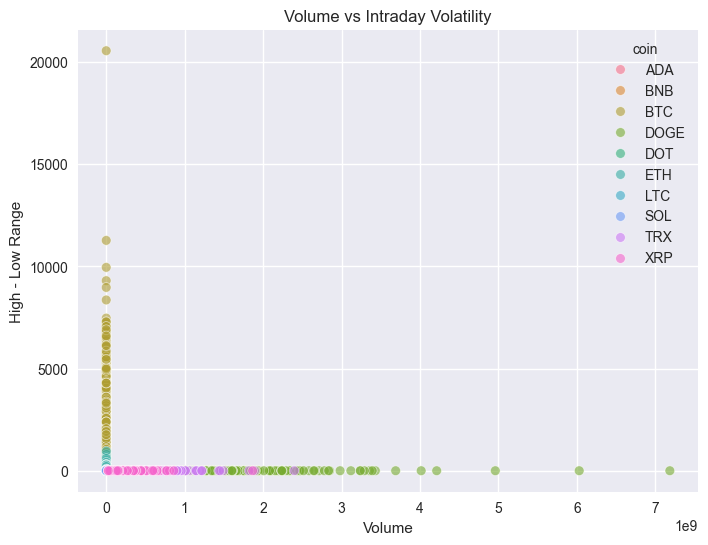

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="volume",
    y="intraday_range",
    hue="coin",
    data=df,
    alpha=0.6
)
plt.title("Volume vs Intraday Volatility")
plt.xlabel("Volume")
plt.ylabel("High - Low Range")
plt.show()

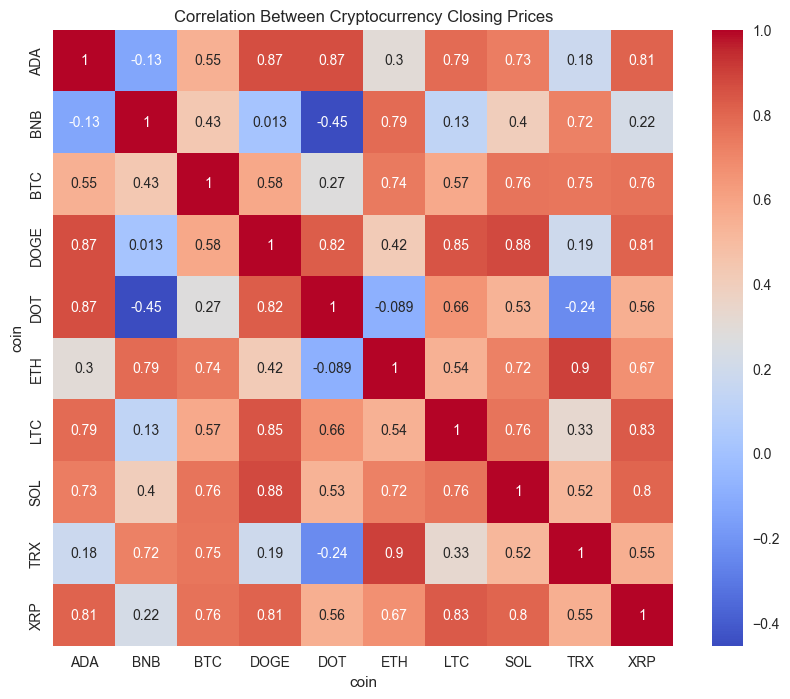

In [13]:
pivot_df = df.pivot(index="date", columns="coin", values="close")

plt.figure(figsize=(10,8))
sns.heatmap(pivot_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Cryptocurrency Closing Prices")
plt.show()